In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_train = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\train_ctrUa4K.csv'
loan_test = r'C:\Users\Admin\Desktop\Desktop\Data Sceince\Analytics Vidhya\Loan Prediction\test_lAUu6dG.csv'

In [3]:
loan_train = pd.read_csv(loan_train)
loan_test = pd.read_csv(loan_test)

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# If Missing values (NaN values) are passed into a model it will give an error and also can reduce model accuracy significantly. So we will find missing value and treat them

In [6]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Treating Missing values
# Now that we have found missing values in variables, we have to fill them to treat them.
# There are many ways to fill missing values, widely used are filling them with Mean/Median/Mode and/or using linear regression/ Random Forest/ K nearest Neighbours method.
# I am using Mean/Median/Mode to fill the missing values
# For Numeric variables mean/median and for categorical and ordinal variables mode, are widely used method to fill missing values

In [8]:
loan_train.describe(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001859,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
# 489 out of 614 applicants are male, so we will impute male inplace of missing values
loan_train["Gender"] = loan_train["Gender"].fillna("Male")
loan_test["Gender"] = loan_test["Gender"].fillna("Male")

In [10]:
# 398 out of 614 applicants were married, so we will impute Yes inplace of missing values
loan_train["Married"] = loan_train["Married"].fillna("Yes")
loan_test["Married"] = loan_test["Married"].fillna("Yes")

# As Dependent variable is a numerical variable, but it is stored as object due to its value 3+, we will treat it and convert it to numeric variable

In [11]:
loan_train["Dependents"] = np.where(loan_train["Dependents"]=="3+",3,loan_train["Dependents"])

loan_test["Dependents"] = np.where(loan_test["Dependents"]=="3+",3,loan_test["Dependents"])

In [12]:
loan_train["Dependents"] = pd.to_numeric(loan_train["Dependents"],errors="coerce")
loan_test["Dependents"] = pd.to_numeric(loan_test["Dependents"],errors="coerce")

# As standard pratice we replace missing values of Numeric variables with mean. However, Dependent variable values are ordinal (0,1,2,3) so replacing them with mean of 0.763 doesn't make sense. So we will use Mode to impute missing values of Dependent variable

In [13]:
loan_train["Dependents"].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [14]:
# 345 out of 614 applicants don't have dependents, so we will impute 0 inplace of missing values
loan_train["Dependents"].fillna(loan_train["Dependents"].mode()[0],inplace=True)

loan_test["Dependents"].fillna(loan_test["Dependents"].mode()[0],inplace=True)

In [15]:
# 500 out of 614 applicants are not self employed, so we will impute No inplace of missing values
loan_train["Self_Employed"] = loan_train["Self_Employed"].fillna("No")
loan_test["Self_Employed"] = loan_test["Self_Employed"].fillna("No")

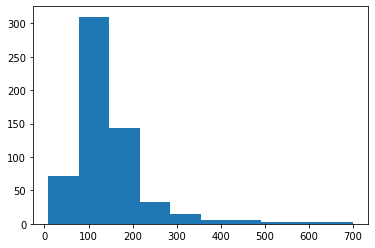

In [16]:
plt.hist(x="LoanAmount",data=loan_train)
plt.show()

# When we have a skewed distribution, the median is a better measure of central tendency than the mean. As we can see from above histogram plot of LoanAmount it is right skewed. So we are going to impute missing values with Median.

In [17]:
loan_train["LoanAmount"].median()

128.0

In [18]:
loan_test["LoanAmount"].median()

125.0

In [19]:
loan_train["LoanAmount"] = loan_train["LoanAmount"].fillna(128.0)
loan_test["LoanAmount"] = loan_test["LoanAmount"].fillna(125.0)

In [20]:
# As values of Loan Amount Term are also ordinal we will use mode to replace missing values
loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].mode()[0],inplace=True)
loan_test["Loan_Amount_Term"].fillna(loan_test["Loan_Amount_Term"].mode()[0],inplace=True)

In [21]:
# As values of Credit History are also ordinal we will use mode to replace missing values
loan_train["Credit_History"].fillna(loan_train["Credit_History"].mode()[0],inplace=True)
loan_test["Credit_History"].fillna(loan_test["Credit_History"].mode()[0],inplace=True)

In [22]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# An Outlier is an observation in a given dataset that lies far from the rest of the observations. It vastly larger or smaller than the remaining values in the data set.Outliers increase variability of data, which decreases statical power of the model. 

# So we will first detect the outliers and than treat them.

Boxplots , Z-score and Inter Quantile Range(IQR) are some of the ways we can detect outliers

Any data point is important as it contains information, unless they are data entry errors, outliers should usually not be removed at all. so firstly we need to understand why is that data point different from others and treat it accordingly. 

Once we have indentified we can treat outliers by either deleting them, or imputing them with mean/median/mode or use inter quantile range or we can take log of it to reduce variablity.

we are going to use logarithmic method to treat outlier

In [24]:
# def remove_outlier_IQR(loan_train):
    #Q1=loan_train.quantile(0.25)
    #Q3=loan_train.quantile(0.75)
    #IQR=Q3-Q1
    #loan_train=loan_train[~((loan_train<(Q1-1.5*IQR)) | (loan_train>(Q3+1.5*IQR)))]
    #return loan_train

In [25]:
loan_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
loan_train["ApplicantIncome_Combined"] = loan_train["ApplicantIncome"] + loan_train["CoapplicantIncome"]

In [27]:
loan_train["ApplicantIncome_Combined_logged"] = np.log(loan_train["ApplicantIncome"])

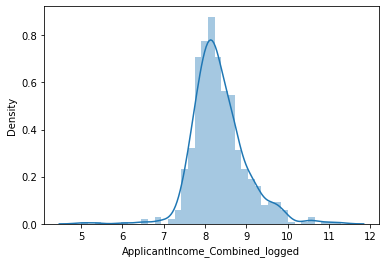

In [28]:
sns.distplot(loan_train["ApplicantIncome_Combined_logged"])

In [29]:
loan_train["LoanAmount_logged"] = np.log(loan_train["LoanAmount"])

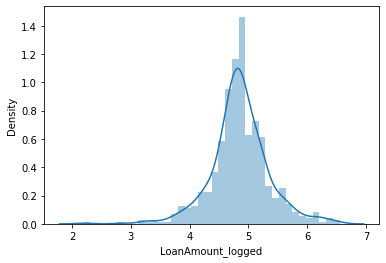

In [30]:
sns.distplot(loan_train["LoanAmount_logged"])

In [31]:
loan_train["Loan_Status"].replace("N",0,inplace=True)
loan_train["Loan_Status"].replace("Y",1,inplace=True)

In [32]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Combined,ApplicantIncome_Combined_logged,LoanAmount_logged
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,8.674026,4.852030
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,8.430109,4.852030
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,7.856707,4.787492
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,8.699515,4.948760


# Machine learning models require all input and output variables to be numeric. If we have categorical data, its needs to encoded to numbers. 

There are 2 ways of converting categorical data to numerical
1) One Hot Encoding
2) label encoding

we are going to use one hot encoding

In [33]:
loan_train = loan_train.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","ApplicantIncome_Combined"],axis=1)

In [34]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Combined_logged,LoanAmount_logged
0,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,1,8.674026,4.852030
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,0,8.430109,4.852030
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,1,8.006368,4.189655
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,1,7.856707,4.787492
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,1,8.699515,4.948760


# get_dummies use one hot encoding to convert categorical columns to numerical and one of the disadvantage of one hot encoding is it increases dimensionality of the data, to avoid this we can use label encoding

In [35]:
loan_train = pd.get_dummies(loan_train)
loan_train.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_Combined_logged,LoanAmount_logged,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,1,8.674026,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1.0,128.0,360.0,1.0,0,8.430109,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0.0,66.0,360.0,1.0,1,8.006368,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0.0,120.0,360.0,1.0,1,7.856707,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0.0,141.0,360.0,1.0,1,8.699515,4.948760,0,1,1,0,1,0,1,0,0,0,1


In [36]:
loan_train.shape

(614, 18)